# **Загрузка данных**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

from wordcloud import WordCloud
from google.colab import files

pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [ ]:
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [ ]:
df = pd.read_csv(r'/content/Tweets.csv',sep = ',')
df.head(7)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


# **Анализ данных**

Насколько заполнены столбцы таблицы?

In [ ]:
(len(df)-df.count())/len(df)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

Удалим неинформативные столбцы "airline_sentiment_gold", "negativereason_gold" и "tweet_coord".  

In [ ]:
del df['airline_sentiment_gold']
del df['negativereason_gold']
del df['tweet_coord']

Количество отзывов и слов

In [ ]:
counter = 0
for i in df['text']:
    for j in i.split():
        counter+=1

print("Number of twits: {}".format(df['airline'].size))
print("Number of words: {}".format(counter))

Number of twits: 14640
Number of words: 258446



Распределение отзывов по классам


Samples per class:
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


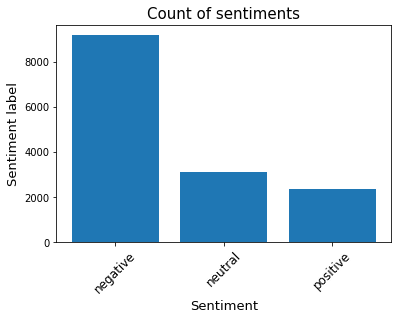

In [ ]:
sentiment_count = df['airline_sentiment'].value_counts()

plt.bar([1,2,3], sentiment_count)
plt.xticks([1,2,3], ['negative','neutral','positive' ], rotation = 45, fontsize = 12)
plt.ylabel('Sentiment label', fontsize = 13)
plt.xlabel('Sentiment', fontsize = 13)
plt.title('Count of sentiments', fontsize = 15)

print("Samples per class:\n{}".format(sentiment_count))

Распределение отзывов по авиалиниям

Total number of tweets for each airline:
 United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America    504 
Name: airline, dtype: int64


Text(0.5, 1.0, 'Count of tweets')

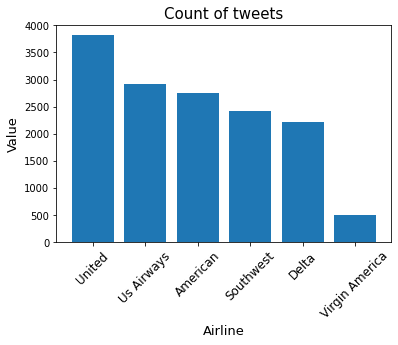

In [ ]:
number_of_tweets = df['airline'].value_counts()
print("Total number of tweets for each airline:\n", number_of_tweets)

index = [1,2,3,4,5,6]
airline_names = ['United', 'Us Airways', 'American', 'Southwest', 'Delta', 'Virgin America']
plt.bar(index, number_of_tweets)
plt.xticks(index, airline_names, rotation = 45, fontsize = 12)
plt.ylabel('Value', fontsize = 13)
plt.xlabel('Airline', fontsize = 13)
plt.title('Count of tweets', fontsize = 15)

Распределение отзывов для каждой авиалинии

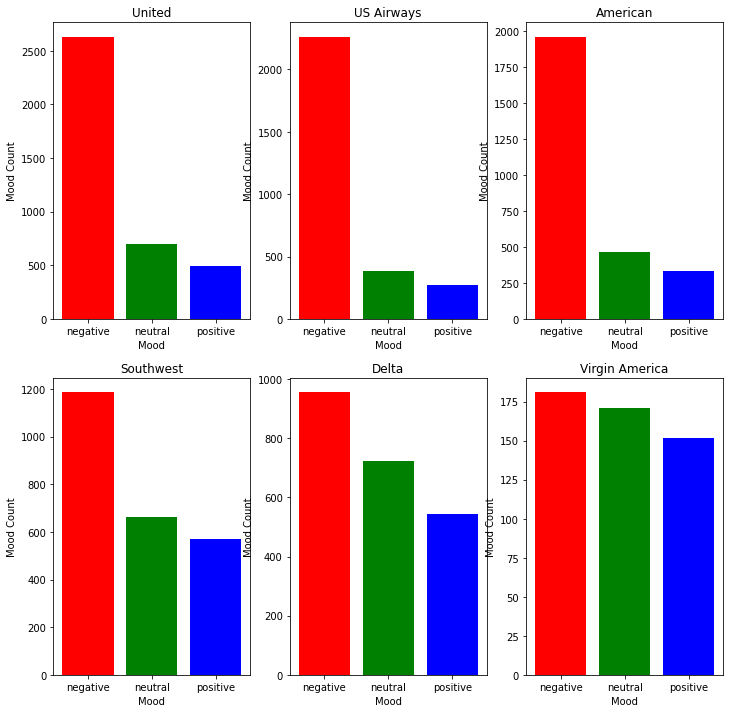

In [ ]:
airline_names = ['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airline_names:
    indices = airline_names.index(i)
    plt.subplot(2, 3, indices + 1)
    new_df = df[df['airline']==i]
    count = new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index, count, color = ['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title(i)

# **Предобработка данных**

## **Обработка текста**

Удалим из отзывов ссылки, обращения к другим авторам, числа, слова из одной и двух букв, оставим остальные слова и смайлы с помощью регулярных выражений. 

Приведем оставшиеся слова к нормальной форме с помощью лемматизации и удалим слова из списка стоп-слов.

In [ ]:
stop_words = stopwords.words("english")
wnl = WordNetLemmatizer()

def preprocessor(text):
    text = re.sub(r'[@#]\S+|https?:\S+|[^❤️💗♥😂😊😍😉👏😃👌😢😞😱😩😞😭😡👿👎✈️A-Za-z\s]+?|\b\S{1,2}\b','',
                str(text).lower())
    text = [wnl.lemmatize(token) for token in text.split(" ")]
    text = [wnl.lemmatize(token, "v") for token in text]
    text = [wnl.lemmatize(token, "a") for token in text]
    text = [word for word in text if not word in stop_words]    
    text = " ".join(text).strip()   
    return text

preprocessor(" @sjkdfh 123 wa https://habr.com/ru/ ak water❤️ l123 s2746 2734d very good liked swam swimming best faster better good")


'water❤️ l good like swim swim best fast good good'

In [ ]:
for i in range(3):#применяем три раза, потому что некоторые слова "очищаются" не сразу
    df.text = df.text.apply(lambda x: preprocessor(x))

df[['text','airline_sentiment']][:5]

,text,airline_sentiment
0,say,neutral
1,plus add commercial experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guest face amp little recourse,negative
4,really big bad thing,negative


## **Облака слов (еще немножко анализа)**

Негативное облако (выделеные наиболее часто встречающиеся слова)





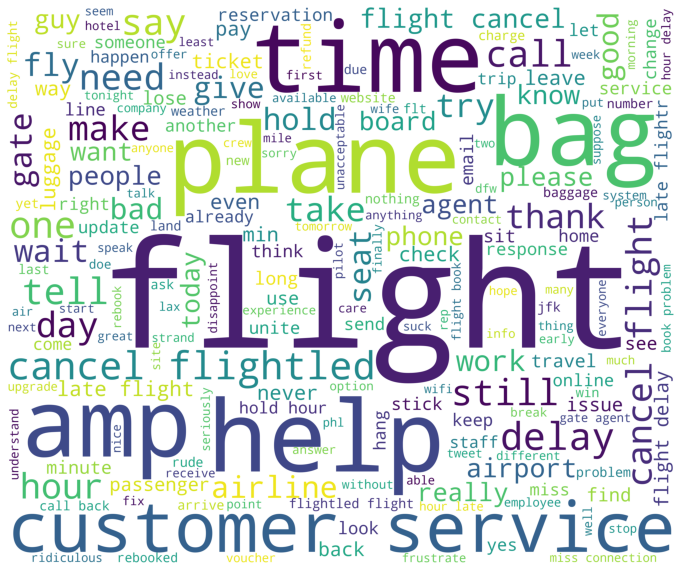

In [ ]:
negative_df = df[df['airline_sentiment']=='negative']
words = ' '.join(negative_df['text'])
negative_words = " ".join([word for word in words.split()])

wordcloud = WordCloud(
                        background_color='white',
                        width=3000,
                        height=2500
                    ).generate(negative_words)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Облако нейтральных слов

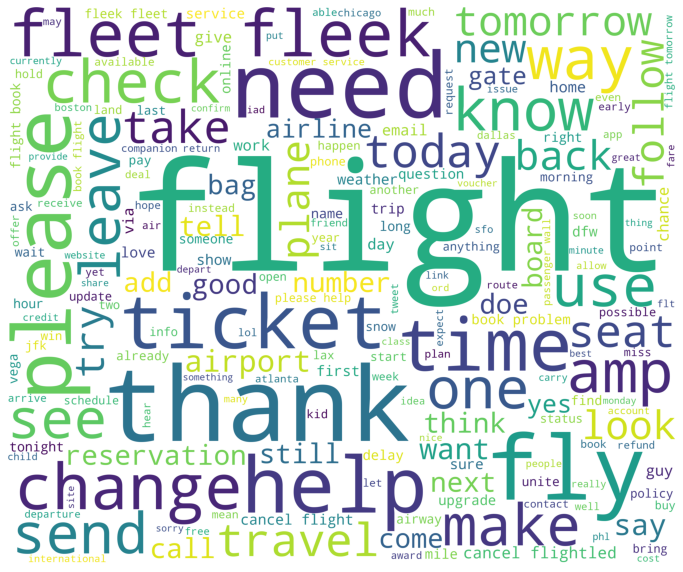

In [ ]:
neutral_df = df[df['airline_sentiment']=='neutral']
words = ' '.join(neutral_df['text'])
neutral_words = " ".join([word for word in words.split()])

wordcloud = WordCloud(
                        background_color='white',
                        width=3000,
                        height=2500
                    ).generate(neutral_words)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Облако позитивных слов

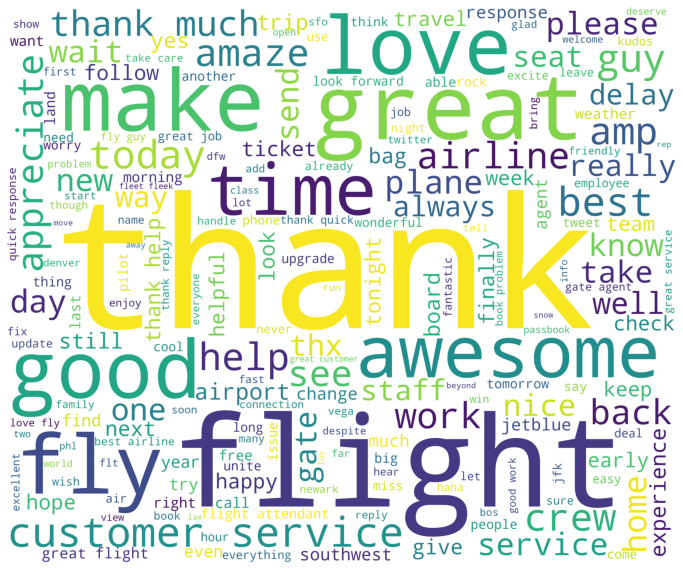

In [ ]:
positive_df = df[df['airline_sentiment']=='positive']
words = ' '.join(positive_df['text'])
positive_words = " ".join([word for word in words.split()])

wordcloud = WordCloud(
                        background_color='white',
                        width=3000,
                        height=2500
                    ).generate(positive_words)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##**Разделение по классам и на тренировочное и тестовое множества**

Перекодируем оттенки отзывов

In [ ]:
def decode_sentiment(label):
    if label == "negative":
        return 0
    elif label == "neutral":
        return 1
    elif label == "positive": 
        return 2

df.airline_sentiment = df.airline_sentiment.apply(lambda x: decode_sentiment(x))

In [ ]:
df[['text','airline_sentiment']][:5]

,text,airline_sentiment
0,say,1
1,plus add commercial experience tacky,2
2,today must mean need take another trip,1
3,really aggressive blast obnoxious entertainment guest face amp little recourse,0
4,really big bad thing,0


Разделение на тренировочное и тестовое множества:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
   df.text, df.airline_sentiment, test_size = 0.20, random_state = 42)

y_test = y_test.to_list()
y_train = y_train.to_list()
x_test = x_test.tolist()
x_train = x_train.tolist()

print("Samples per class in train set: {}".format(np.bincount(y_train)))
print("Samples per class in test set: {}".format(np.bincount(y_test)))

Samples per class in train set: [7289 2519 1904]
Samples per class in test set: [1889  580  459]


Уравниваем количество экземплярова разных типов в тестовом множестве.

In [ ]:
#позитивных и нейтральных
i = 0
while np.bincount(y_test)[1] > np.bincount(y_test)[2]:
    if y_test[i] == 1:
        y_test.pop(i)
        x_test.pop(i)    
        i-=1
    i+=1  

#позитивных и негативных
i = 0
while np.bincount(y_test)[0] > np.bincount(y_test)[2]:
    if y_test[i] == 0:
        y_test.pop(i)
        x_test.pop(i)    
        i-=1
    i+=1     

print("Samples per class in test set: {}".format(np.bincount(y_test)))

Samples per class in test set: [459 459 459]


## **Модель представления данных - мешок слов:**

![](https://drive.google.com/uc?export=view&id=1kYJYpKKf5KF_br_tjrFQgVhcNl90EbgH)

In [ ]:
bag_of_words = CountVectorizer()
x_train_bag = bag_of_words.fit_transform(x_train).toarray()
x_test_bag = bag_of_words.transform(x_test).toarray()
x_train_bag

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print("Number of features:{}".format(x_train_bag.shape[1]))#кол-во слов в словаре

Number of features:7355


# **Применение SVM, RandomForest и результаты**

Используем StandartScaler для масштабирования данных, ибо SVM к ним чувствителен. Гиперпараметр C: меньшее значение С ведет к более широкой полосе, но большему числу нарушений зазора

In [ ]:
clf = Pipeline([
                ("scaler", StandardScaler(with_mean = False)),
               ("linear_svc" , LinearSVC(C=1, loss="hinge")) 
        ])

In [ ]:
clf.fit(x_train_bag,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

**Результаты и предсказания:**

In [ ]:
y_score = clf.predict(x_test_bag)

print("accuracy: {}".format(accuracy_score(y_test, y_score)))
print("Scores for each label:\n   precision: {}".format(precision_score(y_test, y_score, average = None)))
print("   recall: {}".format(recall_score(y_test, y_score,average = None)))
print("   f1: {}".format(f1_score(y_test, y_score,average = None)))

accuracy: 0.6332607116920842
Scores for each label:
   precision: [0.5695581  0.62535211 0.73479319]
   recall: [0.75816993 0.48366013 0.65795207]
   f1: [0.65046729 0.54545455 0.69425287]


[[348  70  41]
 [169 222  68]
 [ 94  63 302]]


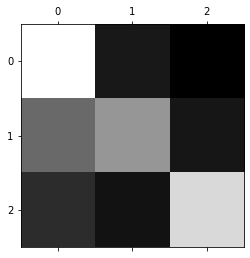

In [ ]:
conf_m = confusion_matrix(y_test, y_score)
print(conf_m)
plt.matshow(conf_m ,cmap=plt.cm.gray)
plt.show() 

In [ ]:
examples = bag_of_words.transform([
        "What a great airline, the trip was a pleasure!",#2 (positive)
        "My issue was quickly resolved after calling customer support. Thanks!",#2 (positive)
        "What the hell! My flight was cancelled again. This sucks!",#0 (negative)
        "Service was awful. I'll never fly with you again.",#0 (negative)
        "I have mixed feelings about airlines. I don't know what I think."#1 (neutral)
    ]).toarray()
clf.predict(examples)

array([2, 2, 1, 0, 1])

In [ ]:
forest_clf = RandomForestClassifier(n_estimators = 200)
forest_clf.fit(x_train_bag, y_train)
y_forest_score = forest_clf.predict(x_test_bag)

In [ ]:
print("accuracy: {}".format(accuracy_score(y_test, y_forest_score)))
print("Scores for each label:\n   precision: {}".format(precision_score(y_test, y_forest_score, average = None)))
print("   recall: {}".format(recall_score(y_test, y_forest_score,average = None)))
print("   f1: {}".format(f1_score(y_test, y_forest_score,average = None)))

accuracy: 0.6594045025417574
Scores for each label:
   precision: [0.56456044 0.71232877 0.80952381]
   recall: [0.89542484 0.45315904 0.62962963]
   f1: [0.69250211 0.5539281  0.70833333]


[[411  32  16]
 [197 210  52]
 [123  44 292]]


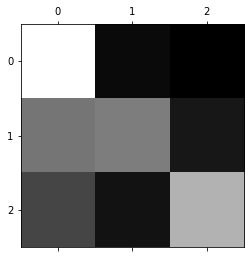

In [ ]:
conf_m_forest = confusion_matrix(y_test, y_forest_score)
print(conf_m_forest)
plt.matshow(conf_m_forest ,cmap=plt.cm.gray)
plt.show() 